In [4]:
print("Kernel is working")

Kernel is working


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

In [6]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
df.shape

(21613, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [9]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
df.isnull().sum().sort_values(ascending=False).head(20)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
dtype: int64

In [11]:
df.nunique().sort_values()

waterfront           2
view                 5
condition            5
floors               6
grade               12
bedrooms            13
bathrooms           30
yr_renovated        70
zipcode             70
yr_built           116
sqft_basement      306
date               372
long               752
sqft_living15      777
sqft_above         946
sqft_living       1038
price             4028
lat               5034
sqft_lot15        8689
sqft_lot          9782
id               21436
dtype: int64

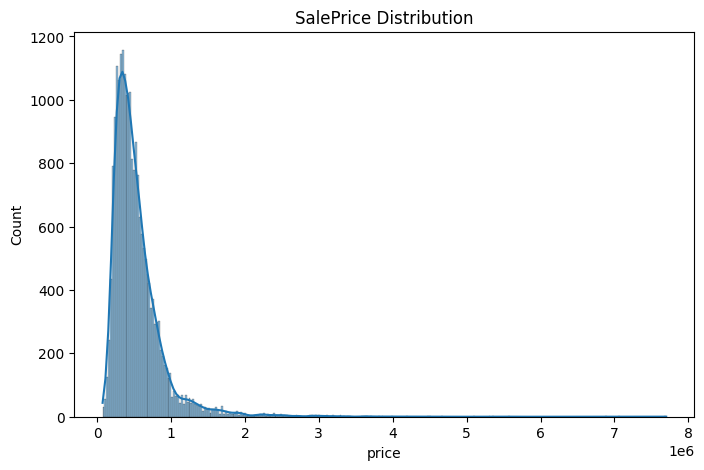

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], kde=True)
plt.title("SalePrice Distribution")
plt.show()

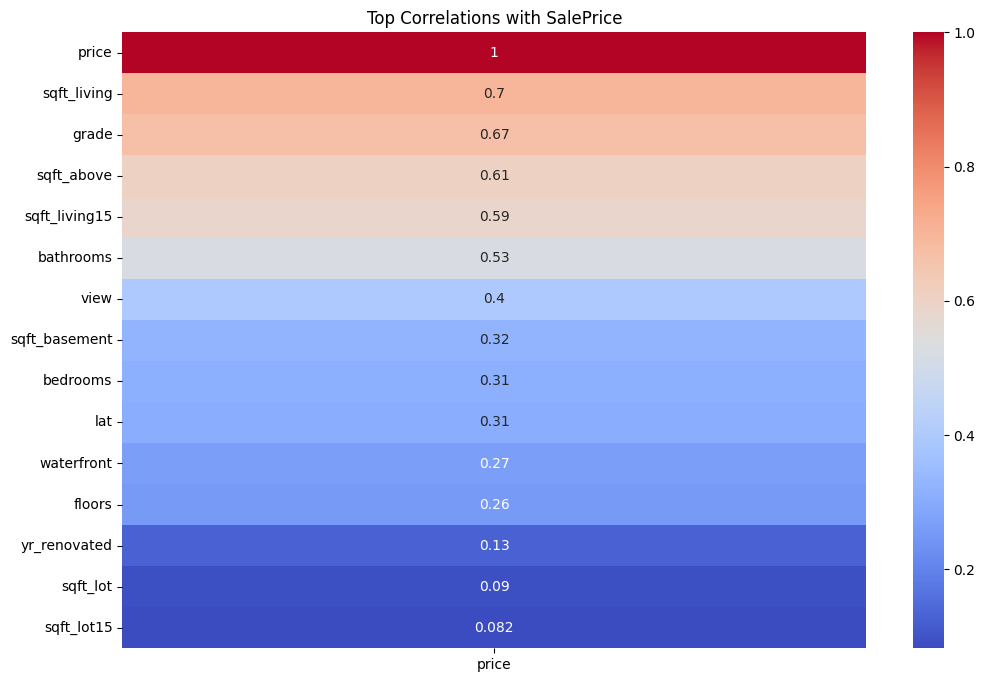

In [13]:
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr['price'].sort_values(ascending=False).head(15).to_frame(), annot=True, cmap='coolwarm')
plt.title("Top Correlations with SalePrice")
plt.show()

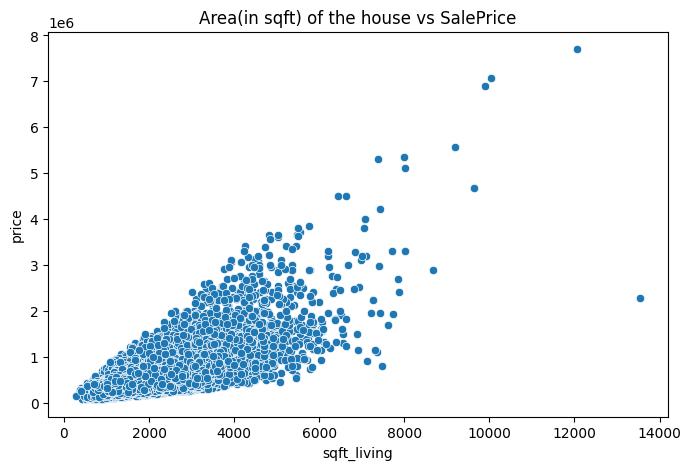

In [14]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['sqft_living'], y=df['price'])
plt.title("Area(in sqft) of the house vs SalePrice")
plt.show()

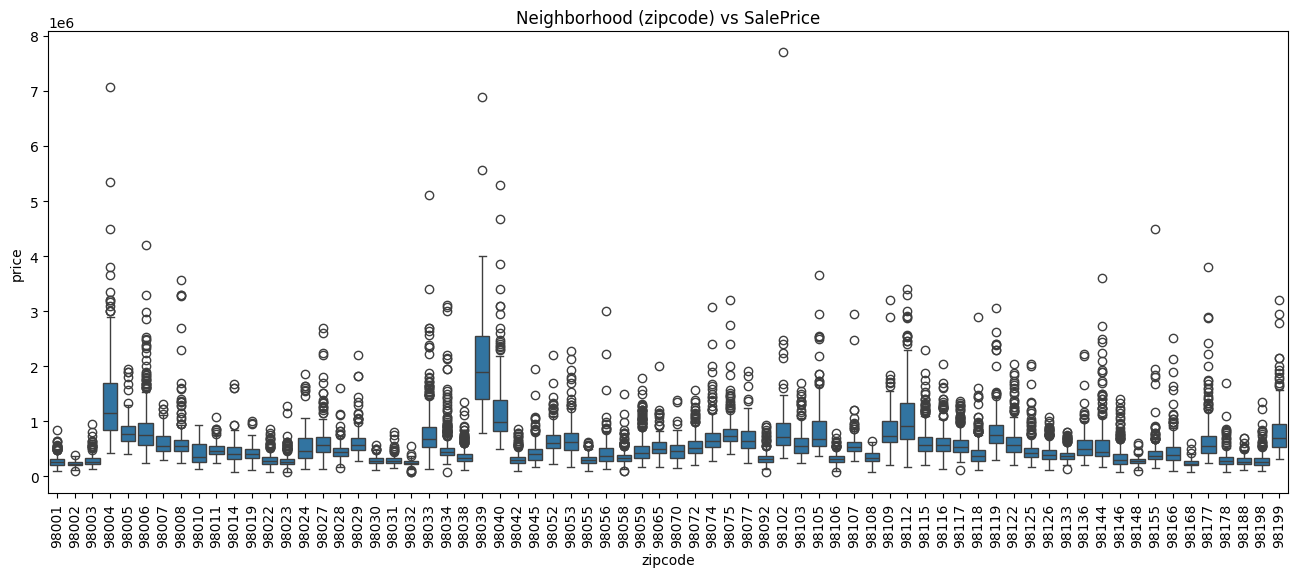

In [15]:
plt.figure(figsize=(16,6))
sns.boxplot(data=df, x="zipcode", y="price")
plt.xticks(rotation=90)
plt.title("Neighborhood (zipcode) vs SalePrice")
plt.show()


In [16]:
# Removing outliers
df = df[df['sqft_living'] < df['sqft_living'].quantile(0.99)]
df = df[df['price'] < df['price'].quantile(0.99)]

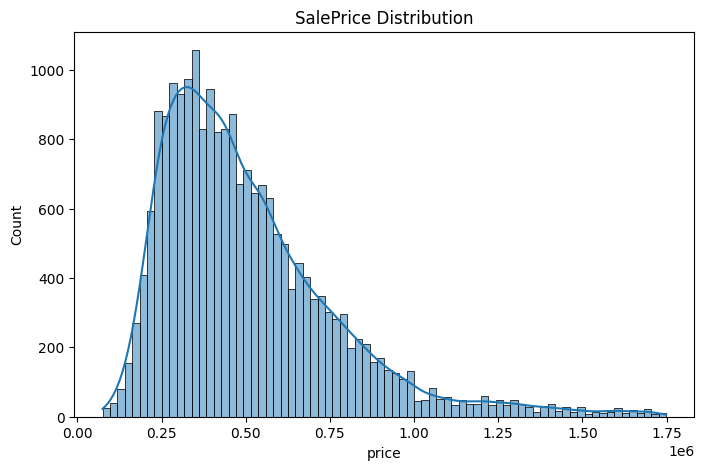

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], kde=True)
plt.title("SalePrice Distribution")
plt.show()

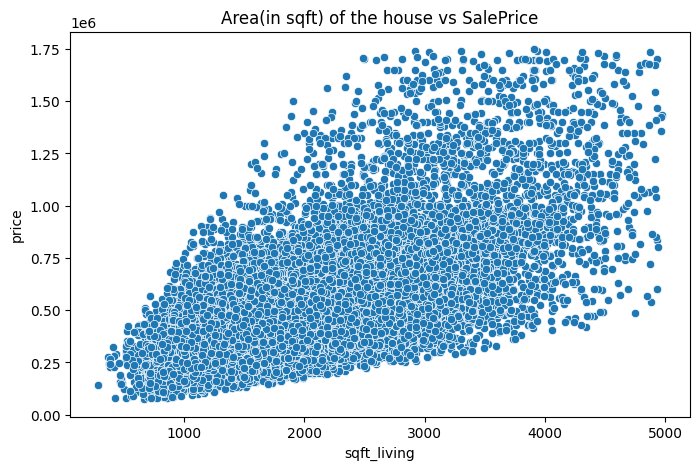

In [18]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['sqft_living'], y=df['price'])
plt.title("Area(in sqft) of the house vs SalePrice")
plt.show()

In [19]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [20]:
df['date'] = pd.to_datetime(df['date'])
df['year_sold'] = df['date'].dt.year
df['month_sold'] = df['date'].dt.month
df = df.drop(columns=['date'])

In [21]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21179 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21179 non-null  int64  
 1   price          21179 non-null  float64
 2   bedrooms       21179 non-null  int64  
 3   bathrooms      21179 non-null  float64
 4   sqft_living    21179 non-null  int64  
 5   sqft_lot       21179 non-null  int64  
 6   floors         21179 non-null  float64
 7   waterfront     21179 non-null  int64  
 8   view           21179 non-null  int64  
 9   condition      21179 non-null  int64  
 10  grade          21179 non-null  int64  
 11  sqft_above     21179 non-null  int64  
 12  sqft_basement  21179 non-null  int64  
 13  yr_built       21179 non-null  int64  
 14  yr_renovated   21179 non-null  int64  
 15  zipcode        21179 non-null  int64  
 16  lat            21179 non-null  float64
 17  long           21179 non-null  float64
 18  sqft_living

In [23]:
# Generate engineered features

# 1️⃣ Price per square foot
df['price_per_sqft'] = df['price'] / df['sqft_living']

# 2️⃣ Age of house
df['house_age'] = df['year_sold'] - df['yr_built']

# 3️⃣ Total bathrooms (counting half baths as 0.5)
df['total_bathrooms'] = df['bathrooms']

cols_to_drop = ['id', 'year_sold', 'month_sold', 'yr_built', 'yr_renovated']
df = df.drop(columns=cols_to_drop)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21179 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            21179 non-null  float64
 1   bedrooms         21179 non-null  int64  
 2   bathrooms        21179 non-null  float64
 3   sqft_living      21179 non-null  int64  
 4   sqft_lot         21179 non-null  int64  
 5   floors           21179 non-null  float64
 6   waterfront       21179 non-null  int64  
 7   view             21179 non-null  int64  
 8   condition        21179 non-null  int64  
 9   grade            21179 non-null  int64  
 10  sqft_above       21179 non-null  int64  
 11  sqft_basement    21179 non-null  int64  
 12  zipcode          21179 non-null  int64  
 13  lat              21179 non-null  float64
 14  long             21179 non-null  float64
 15  sqft_living15    21179 non-null  int64  
 16  sqft_lot15       21179 non-null  int64  
 17  price_per_sqft   

In [25]:
y = df['price']
X = df.drop('price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
y_pred = model.predict(X_test_scaled)

In [29]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 52251.15
RMSE: 80107.33
R² Score: 0.91


In [30]:
# Cross Validation

cv_scores = cross_val_score(
    LinearRegression(),
    X_train_scaled,
    y_train,
    cv=5,
    scoring='r2'
)

print(f"R² scores for each fold: {cv_scores}")
print(f"Average R²: {np.mean(cv_scores):.3f}")

R² scores for each fold: [0.90993709 0.91344451 0.90887326 0.91631568 0.90874902]
Average R²: 0.911


In [31]:
# Trying a Regularized model - Ridge Regression

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

y_pred_ridge = ridge.predict(X_test_scaled)

# Evaluation
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression - MAE: {mae_ridge:.2f}, RMSE: {rmse_ridge:.2f}, R²: {r2_ridge:.3f}")


Ridge Regression - MAE: 52251.36, RMSE: 80107.43, R²: 0.909


Since The R² score for the baseline model is better than the ridge regression, that is what I will be using for evaluation and results 

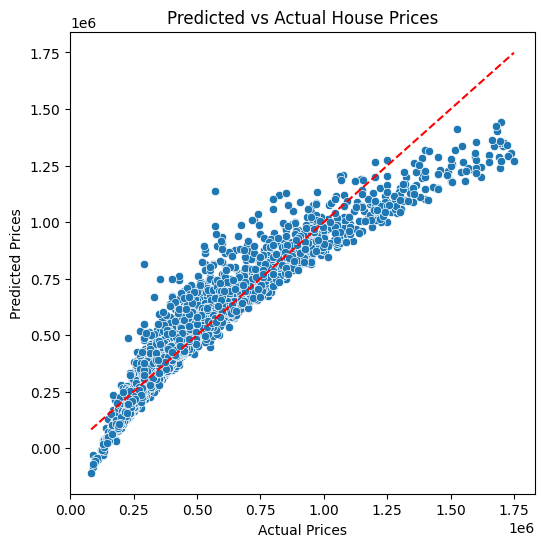

In [32]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

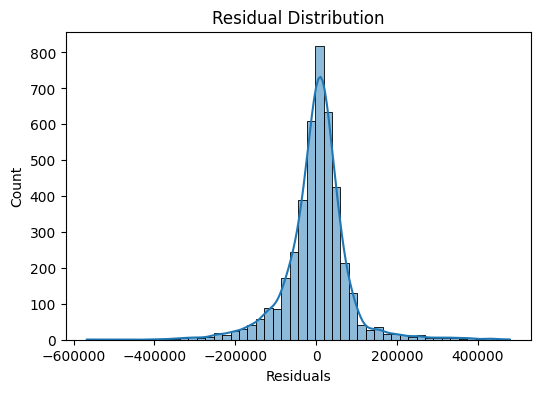

In [33]:
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=50, kde=True)
plt.xlabel("Residuals")
plt.title("Residual Distribution")
plt.show()

In [34]:
coef_df = pd.DataFrame({
    'Feature': X_train.columns,  # your original feature names
    'Coefficient': model.coef_   # coefficients from the trained linear regression
})

# Sort by coefficient to see which features increase or decrease price
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Top features that increase price
print("Top Positive Coefficients (increase price):")
print(coef_df.head(10))

# Top features that decrease price
print("\nTop Negative Coefficients (decrease price):")
print(coef_df.tail(10))

Top Positive Coefficients (increase price):
            Feature    Coefficient
16   price_per_sqft  168046.591746
2       sqft_living   95433.263193
9        sqft_above   77390.124027
10    sqft_basement   45314.556634
8             grade   32770.607731
17        house_age   12212.854839
6              view   11914.561064
12              lat    8384.480089
7         condition    6791.147571
18  total_bathrooms    4820.658442

Top Negative Coefficients (decrease price):
            Feature  Coefficient
18  total_bathrooms  4820.658442
1         bathrooms  4820.658442
5        waterfront  4028.445632
0          bedrooms  3284.876785
13             long   819.007131
4            floors  -160.513726
3          sqft_lot -1221.917102
14    sqft_living15 -2012.117623
15       sqft_lot15 -2649.191305
11          zipcode -5218.766992
